In [27]:
import pandas as pd

# df = pd.read_csv('CombinedBeansPrice.csv')
df = pd.read_csv('CombinedCarrotPrice.csv')

In [28]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_dropped = df.dropna(thresh=threshold, axis=1)

# Display the columns that remain after dropping
df_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             1792 non-null   object
 1   Item             1792 non-null   object
 2   Pettah           1289 non-null   object
 3   Kandy            1783 non-null   object
 4   Dambulla         1781 non-null   object
 5   Meegoda          1674 non-null   object
 6   Thambuththegama  1626 non-null   object
 7   Keppetipola      1241 non-null   object
 8   Nuwaraeliya      1504 non-null   object
dtypes: object(9)
memory usage: 126.1+ KB


In [29]:
df_dropped.isnull().sum()

Date                 0
Item                 0
Pettah             503
Kandy                9
Dambulla            11
Meegoda            118
Thambuththegama    166
Keppetipola        551
Nuwaraeliya        288
dtype: int64

In [30]:
import pandas as pd
import numpy as np

# Function to convert price ranges to their average value
def convert_price_range(price_range):
    if pd.isna(price_range):
        return np.nan
    try:
        # Split the price range by hyphens and filter out any empty strings
        prices = [float(price) for price in price_range.split('-') if price]
        # Calculate the average of the two prices
        return sum(prices) / len(prices)
    except:
        return np.nan

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_dropped = df.dropna(thresh=threshold, axis=1)

# Apply the conversion function to the relevant columns
for column in ['Pettah', 'Kandy', 'Dambulla', 'Meegoda', 'Thambuththegama', 'Keppetipola']:
    df_dropped[column] = df_dropped[column].apply(convert_price_range)

# Convert the Date column to datetime
df_dropped['Date'] = pd.to_datetime(df_dropped['Date'])

# Set the Date column as the index
df_dropped.set_index('Date', inplace=True)

# Display the dataframe after conversion
df_dropped.head()



/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73454/2807792457.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[column] = df_dropped[column].apply(convert_price_range)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73454/2807792457.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Date'] = pd.to_datetime(df_dropped['Date'])


,Item,Pettah,Kandy,Dambulla,Meegoda,Thambuththegama,Keppetipola,Nuwaraeliya
Date,,,,,,,,
2016-01-02,Beans,235.0,185.0,195.0,180.0,NaN,NaN,NaN
2016-01-03,Beans,85.0,85.0,80.0,102.5,110.0,NaN,NaN
2016-01-04,Carrot,85.0,95.0,82.5,90.0,95.0,NaN,NaN
2016-01-06,Carrot,135.0,185.0,150.0,185.0,165.0,NaN,NaN
2016-01-07,Carrot,140.0,170.0,180.0,180.0,NaN,NaN,NaN


In [31]:
df_dropped.isnull().sum()

Item                 0
Pettah             503
Kandy               11
Dambulla            13
Meegoda            118
Thambuththegama    166
Keppetipola        551
Nuwaraeliya        288
dtype: int64

In [32]:
columns_with_forward_fill = ['Kandy', 'Dambulla']

for column in columns_with_forward_fill:
    df_dropped[column].fillna(method='ffill', inplace=True)

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73454/1313563479.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped[column].fillna(method='ffill', inplace=True)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73454/1313563479.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dropped[column].fillna(method='ffill', inplace=True)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73454/1313563479

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame
# Replace df with df_dropped if you're working with a DataFrame named df_dropped

# Select only the desired columns
filtered_df = df[['Date', 'Kandy', 'Dambulla']]

# Export the filtered DataFrame to a CSV file
filtered_df.to_csv('Carrot.csv', index=False)

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73454/1695980914.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  kandy_series_ffill = kandy_series.fillna(method='ffill')


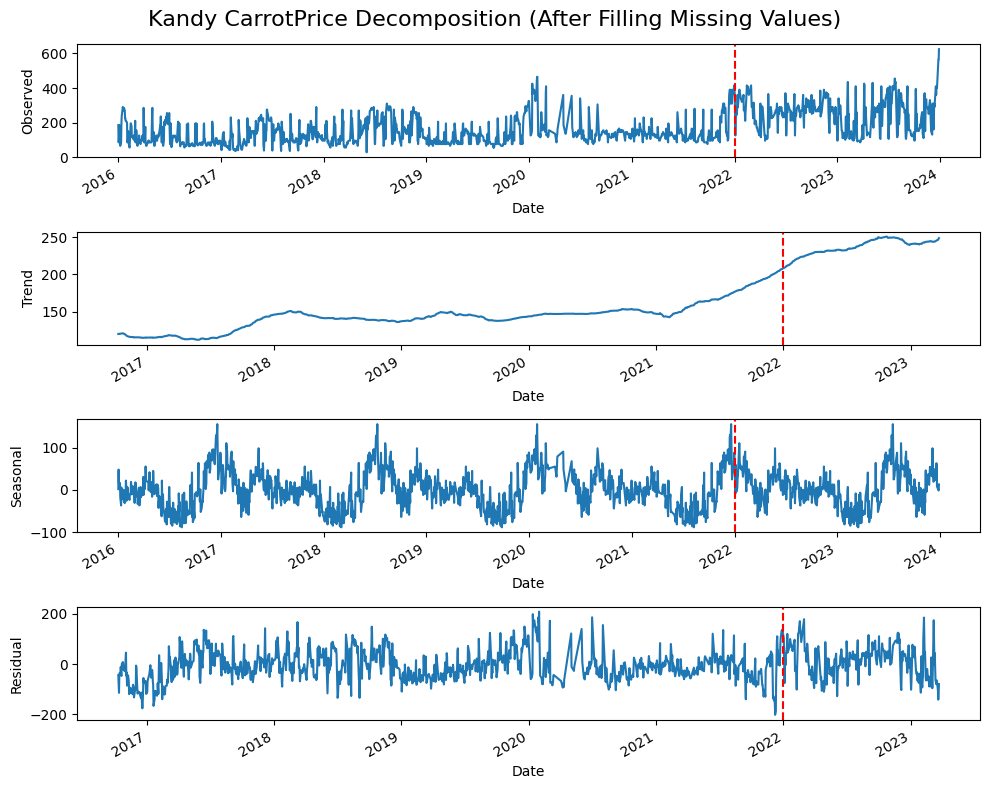

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to decompose a time series and plot the components
def plot_decomposition(series, title):
    decomposition = seasonal_decompose(series, model='additive', period=365)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
    fig.suptitle(title, fontsize=16)
    
    # Plot observed component
    decomposition.observed.plot(ax=ax1, legend=False)
    ax1.axvline(pd.Timestamp('2022-01-01'), color='red', linestyle='--')
    ax1.set_ylabel('Observed')
    
    # Plot trend component
    decomposition.trend.plot(ax=ax2, legend=False)
    ax2.axvline(pd.Timestamp('2022-01-01'), color='red', linestyle='--')
    ax2.set_ylabel('Trend')
    
    # Plot seasonal component
    decomposition.seasonal.plot(ax=ax3, legend=False)
    ax3.axvline(pd.Timestamp('2022-01-01'), color='red', linestyle='--')
    ax3.set_ylabel('Seasonal')
    
    # Plot residual component
    decomposition.resid.plot(ax=ax4, legend=False)
    ax4.axvline(pd.Timestamp('2022-01-01'), color='red', linestyle='--')
    ax4.set_ylabel('Residual')
    
    plt.tight_layout()
    plt.show()

# Extract Pettah series and fill missing values with forward fill for decomposition
kandy_series = df_dropped['Kandy']
kandy_series_ffill = kandy_series.fillna(method='ffill')

# Plot decomposition before filling missing values
# plot_decomposition(pettah_series, 'Pettah Price Decomposition (Before Filling Missing Values)')

# Plot decomposition after filling missing values
plot_decomposition(kandy_series_ffill, 'Kandy CarrotPrice Decomposition (After Filling Missing Values)')


In [24]:
kandy_series.isnull().sum()

11

In [22]:
df_dropped.to_csv('CarrotPrice.csv', index=True)

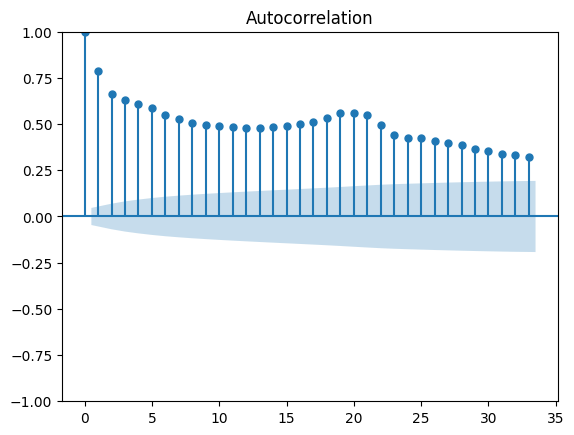

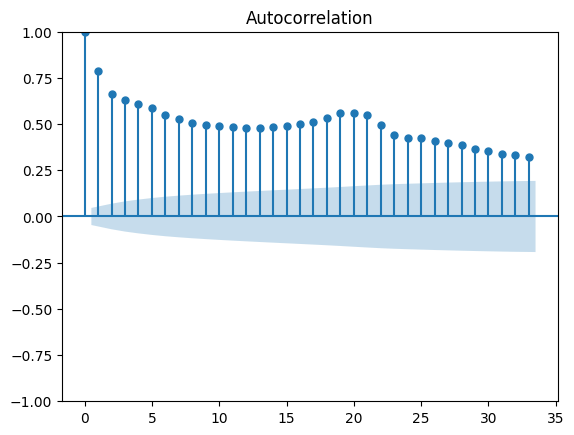

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(kandy_series_ffill)

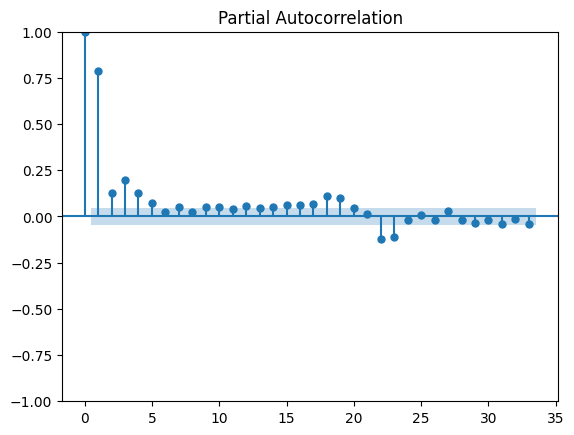

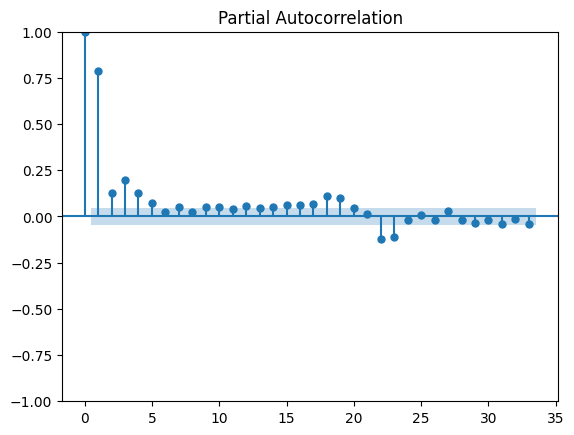

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(kandy_series_ffill)

In [20]:
df_kandy_dambulla = df_dropped[['Kandy', 'Dambulla']].copy()

# Forward fill missing values in 'Kandy' and 'Dambulla'
df_kandy_dambulla.fillna(method='ffill', inplace=True)
df_kandy_dambulla.reset_index(inplace=True)

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73454/4271546551.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_kandy_dambulla.fillna(method='ffill', inplace=True)


23:52:41 - cmdstanpy - INFO - Chain [1] start processing
23:52:41 - cmdstanpy - INFO - Chain [1] done processing


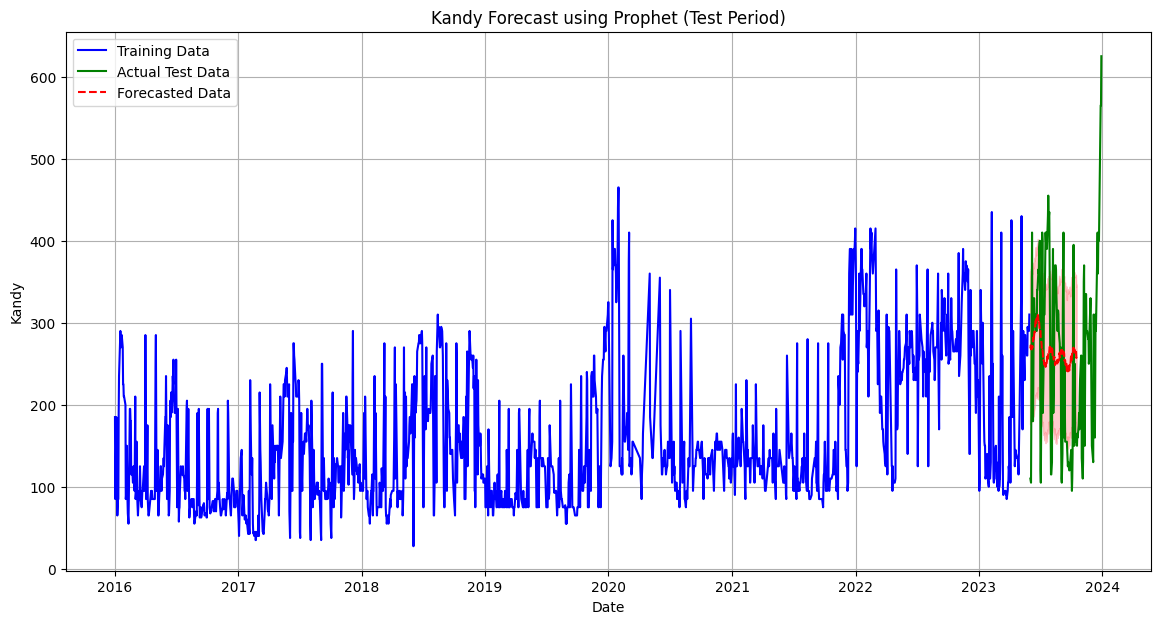

ValueError: Input contains NaN.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Ensure 'Date' is in datetime format and rename columns for Prophet

df_prophet = df_kandy_dambulla[['Date', 'Kandy']].rename(columns={'Date': 'ds', 'Kandy': 'y'})

# Split the data into training and test sets
split_date = '2023-06-01'  # Adjust this date based on your data
train = df_prophet[df_prophet['ds'] < split_date]
test = df_prophet[df_prophet['ds'] >= split_date]

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(train)

# Create a DataFrame for future dates (i.e., the test period)
future = model.make_future_dataframe(periods=len(test), freq='D')

# Forecast
forecast = model.predict(future)

# Filter forecast data to match the test period
forecast_test = forecast[forecast['ds'] >= split_date]

# Merge forecast with actual test data
forecast_test = forecast_test.merge(test, on='ds', how='left')

# Plot the results
plt.figure(figsize=(14, 7))

# Plot the training data
plt.plot(train['ds'], train['y'], color='blue', label='Training Data')

# Plot the actual test data
plt.plot(test['ds'], test['y'], color='green', label='Actual Test Data')

# Plot the forecasted data
plt.plot(forecast_test['ds'], forecast_test['yhat'], color='red', linestyle='--', label='Forecasted Data')

# Plot the forecast uncertainty intervals
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='red', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Kandy')
plt.title('Kandy Forecast using Prophet (Test Period)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the Mean Squared Error for the test period
mse = mean_squared_error(forecast_test['y'], forecast_test['yhat'])
print(f'Mean Squared Error: {mse}')
